Multiclass Fish Image Classification

In [7]:

! pip install torchvision 

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 787.7 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.7 MB 787.7 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.7 MB 547.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.7 MB 547.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.7 MB 618.3 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.7 MB 593.2 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.7 MB 593.2 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/1.7 MB 542.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.7 MB 532.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.7 MB 532.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.7 MB 532.5 kB/s eta 0:00:03
   -


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [48]:
! pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# install required packages

! pip install torchvision   # specially focus on computer vision task
! pip install torch


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB 163.8 kB/s eta 0:21:37
   ---------------------------------------- 0.0/212.5 MB 163.8 kB/s eta 0:21:37
   ---------------------------------------- 0.0/212.5 MB 122.9 kB/s eta 0:28:50
   ---------------------------------------- 0.0/212.5 MB 122.9 kB/s eta 0:28:50
   ---------------------------------------- 0.1/212.5 MB 124.9 kB/s eta 0:28:22
   ---------------------------------------- 0.1/212.5 MB 124.9 kB/s eta 0:28:22
   ---------------------------------------- 0.1/212.5 MB 124.9 kB/s eta 0:28:22
   -----------

In [1]:
#import required libraries

import os # manage path, folder, files

import torch #building and training deep learning models

import torch.nn as nn # layer, activation, loss fuction

from PIL import Image # for image read

import torch.optim as optim # optimizers

from torchvision import datasets, transforms

from torch.utils.data import DataLoader

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Optimizers**

 An optimizer updates the model’s weights to reduce that loss and improve performance.

**PIL - pillow**

  For opening, manipulating, and saving images in Python.

**Transforms**

Used to preprocess images resize, normalize, convert to tensor..

**DataLoader**

 Helps load datain batches and shuffle it during training

In [2]:
os.getcwd()

'e:\\project\\fish_image_classification_project_5'

In [3]:
fish_img_path = "E:\project\Fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data"

In [4]:
#change directory to drive path
os.chdir(fish_img_path)

In [5]:
os.listdir()

['test', 'train', 'val']

In [6]:
os.listdir('test')

['animal fish',
 'animal fish bass',
 'fish sea_food black_sea_sprat',
 'fish sea_food gilt_head_bream',
 'fish sea_food hourse_mackerel',
 'fish sea_food red_mullet',
 'fish sea_food red_sea_bream',
 'fish sea_food sea_bass',
 'fish sea_food shrimp',
 'fish sea_food striped_red_mullet',
 'fish sea_food trout']

In [7]:
len(os.listdir('test'))

11

In [8]:
# test image count
test_path = 'test'
for i in os.listdir (test_path):
  folder_path = os.path.join(test_path , i)
  if os.path.isdir(folder_path):
    files_count = len(os.listdir(folder_path))
    print(f'{folder_path} : {files_count}')

test\animal fish : 520
test\animal fish bass : 13
test\fish sea_food black_sea_sprat : 298
test\fish sea_food gilt_head_bream : 305
test\fish sea_food hourse_mackerel : 286
test\fish sea_food red_mullet : 291
test\fish sea_food red_sea_bream : 273
test\fish sea_food sea_bass : 327
test\fish sea_food shrimp : 289
test\fish sea_food striped_red_mullet : 293
test\fish sea_food trout : 292


In [9]:
#train image count
train_path = 'train'
for i in os.listdir(train_path):
  folder_path = os.path.join(train_path, i)
  if os.path.isdir(folder_path):
    files_count = len(os.listdir(folder_path))
    print(f"{folder_path} : {files_count}")

train\animal fish : 1096
train\animal fish bass : 30
train\fish sea_food black_sea_sprat : 569
train\fish sea_food gilt_head_bream : 566
train\fish sea_food hourse_mackerel : 573
train\fish sea_food red_mullet : 579
train\fish sea_food red_sea_bream : 571
train\fish sea_food sea_bass : 538
train\fish sea_food shrimp : 576
train\fish sea_food striped_red_mullet : 547
train\fish sea_food trout : 580


In [10]:
#train image count
val_path = 'val'
for i in os.listdir(val_path):
  folder_path = os.path.join(val_path, i)
  if os.path.isdir(folder_path):
    files_count = len(os.listdir(folder_path))
    print(f"{folder_path} : {files_count}")


val\animal fish : 187
val\animal fish bass : 10
val\fish sea_food black_sea_sprat : 105
val\fish sea_food gilt_head_bream : 94
val\fish sea_food hourse_mackerel : 97
val\fish sea_food red_mullet : 90
val\fish sea_food red_sea_bream : 113
val\fish sea_food sea_bass : 97
val\fish sea_food shrimp : 100
val\fish sea_food striped_red_mullet : 101
val\fish sea_food trout : 98


**Uneven class distribution**

Some classes having fewer images compared to other fish class

uneven class distribution - affect the performance during training

So apply **data augmentation** techniques to increase the number of images.




In [11]:
for i in os.listdir('val/animal fish bass'):
  folder_path = os.path.join('val/animal fish bass', i)
  img = Image.open(folder_path)
  print(img.size)  # image resolution same

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


In [ ]:
# data preprocessing and Agumentation
# for training data

train_transform = transforms.Compose(
    [
        transforms.RandomResizedCrop(224, scale = (0.8, 1.0)), #random zoom + crop
        transforms.RandomHorizontalFlip(), # flip the image (right ---> left)
        transforms.RandomRotation(15), # random rotation clockwise or counter clockwise
        transforms.ToTensor() #rescale to [0,1]

    ])


In [13]:
# for test and val
# data preprocessing

test_val_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)), #resize piexel same as training
        transforms.ToTensor() #convert image to tensor
    ]
)

In [14]:
# load the dataset

train_datasets = datasets.ImageFolder('E:\\project\\Fish_image_classification_project_5\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\train', transform = train_transform)

test_datasets = datasets.ImageFolder('E:\\project\\Fish_image_classification_project_5\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\test', transform= test_val_transform)

val_datasets = datasets.ImageFolder('E:\\project\\Fish_image_classification_project_5\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\val', transform= test_val_transform)




In [15]:
train_datasets

Dataset ImageFolder
    Number of datapoints: 6225
    Root location: E:\project\Fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

In [16]:
test_datasets

Dataset ImageFolder
    Number of datapoints: 3187
    Root location: E:\project\Fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [17]:
val_datasets

Dataset ImageFolder
    Number of datapoints: 1092
    Root location: E:\project\Fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\val
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [30]:
# create the dataloader
train_data_loader = DataLoader(train_datasets, batch_size = 5, shuffle = True)
test_data_loader = DataLoader(test_datasets, batch_size = 5, shuffle = True)
val_data_loader = DataLoader(val_datasets, batch_size = 5, shuffle = True)


In [31]:
for i in train_data_loader:
  print(i)
  break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 

In [32]:
for i in test_data_loader:
    print(i)
    break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0039],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 

In [ ]:
# Model building

model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding= 1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Dropout(),

    nn.Conv2d(32, 35, kernel_size= 3, padding = 1),
    nn.LeakyReLU(),
    nn.MaxPool2d(2,2),
    nn.Flatten(),
    nn.Linear(109760, 40),
    nn.ReLU(),
    nn.Linear(40,11)

)


In [34]:
# initialize
model_loss = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr = 0.001)


In [35]:
# model training

epoch = 15

for i in range(epoch):
  
  model.train()
  
  cl_loss = 0 # initialize total loss = 0

  for img, tar in train_data_loader:     #img (input image batch), target values (labels).
    
    optimizer.zero_grad() #clear previous gradients
    
    predicted_output = model(img) # get the predictions 
    
    # Calculates the loss between model predictions and true labels.
    
    loss = model_loss(predicted_output, tar) 
     
    loss.backward() # backward pass calculate gradients
    
    optimizer.step() #update the weight using gradients

    cl_loss += loss #add batch loss to total loss

  print("Epoch : ", i , " Loss ====> ", cl_loss)

Epoch :  0  Loss ====>  tensor(1920.3881, grad_fn=<AddBackward0>)
Epoch :  1  Loss ====>  tensor(1063.3976, grad_fn=<AddBackward0>)
Epoch :  2  Loss ====>  tensor(828.9827, grad_fn=<AddBackward0>)
Epoch :  3  Loss ====>  tensor(642.4679, grad_fn=<AddBackward0>)
Epoch :  4  Loss ====>  tensor(552.3497, grad_fn=<AddBackward0>)
Epoch :  5  Loss ====>  tensor(476.1689, grad_fn=<AddBackward0>)
Epoch :  6  Loss ====>  tensor(375.4939, grad_fn=<AddBackward0>)
Epoch :  7  Loss ====>  tensor(357.7896, grad_fn=<AddBackward0>)
Epoch :  8  Loss ====>  tensor(327.4314, grad_fn=<AddBackward0>)
Epoch :  9  Loss ====>  tensor(323.0703, grad_fn=<AddBackward0>)
Epoch :  10  Loss ====>  tensor(304.3388, grad_fn=<AddBackward0>)
Epoch :  11  Loss ====>  tensor(272.4195, grad_fn=<AddBackward0>)
Epoch :  12  Loss ====>  tensor(242.1755, grad_fn=<AddBackward0>)
Epoch :  13  Loss ====>  tensor(233.3227, grad_fn=<AddBackward0>)
Epoch :  14  Loss ====>  tensor(251.8998, grad_fn=<AddBackward0>)


In [ ]:
# model evaluation
# Train data

model.eval()

correct_prediction = 0 #  calculate how many predictions correct
total = 0   #  Total number of images evaluated


all_prediction = []
all_targets = [] # all true label
 
with torch.no_grad(): # turn off gradient calculation for evaluation
    
    for img, tar in train_data_loader:
        
        predicted_output = model(img) # get model predictions
        
        #(tensor, index)
        _, predicted = torch.max(predicted_output, 1) # take the class with highest score (tensor, index)
        
        total += tar.size(0) # total image
        
        correct_prediction += (predicted == tar).sum().item() #correct predictions
        
        all_prediction.extend(predicted.cpu().numpy())  #NumPy doesn't work with GPU tensors
        all_targets.extend(tar.cpu().numpy())
        
    # accuracy
    accuracy = 100* correct_prediction / total
    print(f"Train Accuracy: {accuracy:.2f}%")
    
    # precision
    precision = precision_score(all_targets, all_prediction, average = 'macro')
    print(f"Train precision: {precision *100:.2f}%")
    
    #recall
    recall = recall_score(all_targets, all_prediction, average = 'macro')
    print(f"Train recall: {recall *100:.2f}%")
    

Train Accuracy: 92.67%
Train precision: 0.90
Train recall: 0.86


In [ ]:
# model evaluation
#test data


model.eval()

correct = 0 #  calculate how many predictions correct
total = 0   # total no of samples

all_prediction = []
all_targets = []
 
with torch.no_grad(): # turn off gradient calculation for evaluation
    
    for img, tar in test_data_loader:
        
        predicted_output = model(img) #model predictions
        
    #(tensor, index)
        _, predicted = torch.max(predicted_output, 1) # take the class with highest score (tensor, index)
        
        total += tar.size(0) # total image
        
        correct += (predicted == tar).sum().item() #correct predictions
        
        
        all_prediction.extend(predicted.cpu().numpy())
        all_targets.extend(tar.cpu().numpy())
        
        
        
      # accuracy
    accuracy = 100* correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    
    # precision
    
    # (Macro: equal weight for each class)
    precision = precision_score(all_targets, all_prediction, average = 'macro')
    print(f"Test precision: {precision *100:.2f}%")
    
    #recall
    recall = recall_score(all_targets, all_prediction, average = 'macro')
    print(f"Test recall: {recall *100:.2f}%")
    

Test Accuracy: 95.04%
Test precision: 86.39
Test recall: 86.69


In [40]:
# for validatation data

model.eval()
val_loss = 0
correct = 0
total = 0

all_prediction = []
all_targets = []


with torch.no_grad():
    for img, tar in val_data_loader:
        output = model(img)
        loss = model_loss(output, tar)
        val_loss += loss.item()
        
        _, predicted = torch.max(output, 1)
        total += tar.size(0)
        correct += (predicted == tar).sum().item()
        
        all_prediction.extend(predicted.cpu().numpy())
        all_targets.extend(tar.cpu().numpy())
        
        
        
    # accuracy
    accuracy = 100* correct / total
    print(f"validation Accuracy: {accuracy:.2f}%")
    
    # precision
    
    # (Macro: equal weight for each class)
    precision = precision_score(all_targets, all_prediction, average = 'macro')
    print(f"validation precision: {precision *100:.2f}%")
    
    #recall
    recall = recall_score(all_targets, all_prediction, average = 'macro')
    print(f"validation recall: {recall *100:.2f}%")
    
    

validation Accuracy: 94.41%
validation precision: 86.04%
validation recall: 86.33%


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
test_image = r"E:\project\fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test\animal fish\0JIAU5EUSBUU.jpg"

In [42]:
itest = Image.open(test_image)
itest.show()

In [43]:
processed_img = test_val_transform(itest).unsqueeze(0)

In [44]:
pred_ = model(processed_img)

In [45]:
pred_

tensor([[ 43.1588,  26.4724, -78.8333, -16.2430, -27.9767, -62.8432, -27.6178,
         -19.1937, -90.8784, -57.3013, -19.2066]], grad_fn=<AddmmBackward0>)

In [46]:
_, pred_op = torch.max(pred_, 1)

In [47]:
pred_op # tensor([0]) - animal fish

tensor([0])

#### Prediction and Validation for Test Data

In [48]:
class_names = [
    "animal fish", 
    "animal fish bass",
    "fish sea_food black_sea_sprat", 
    "fish sea_food gilt_head_bream",
    "fish sea_food hourse_mackerel",
    "fish sea_food red_mullet", 
    "fish sea_food red_sea_bream",
    "fish sea_food sea_bass",
    "fish sea_food shrimp",
    "fish sea_food striped_red_mullet",
    "fish sea_food trout"
]

In [49]:
from IPython.display import display
def pred_image_class(img_path):
    itest = Image.open(img_path)
    i = itest.resize((300,300))
    display(i)
    processed_img = test_val_transform(itest).unsqueeze(0)
    pred_ = model(processed_img)
    print("support", pred_)
    _, pred_op = torch.max(pred_, 1)
    predicted_class = class_names[pred_op.item()]
    print(f"Predicted class : {predicted_class}")
    return predicted_class

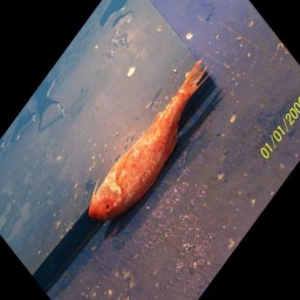

support tensor([[ -2.7743, -11.2441, -14.1395,  -4.9074, -24.2346,   5.5504, -15.3755,
          -0.2348, -10.8922,   0.5254, -22.1738]], grad_fn=<AddmmBackward0>)
Predicted class : fish sea_food red_mullet


'fish sea_food red_mullet'

In [61]:
img_path = r"E:\project\Fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test\fish sea_food red_mullet\0DTLG8H3NN5N.jpg"
pred_image_class(img_path)

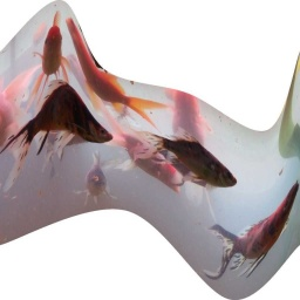

support tensor([[ 27.5939,  16.7368, -34.1494, -30.2377, -23.9435, -11.8503, -27.4996,
         -14.7049, -20.0958, -15.9202, -39.8267]], grad_fn=<AddmmBackward0>)
Predicted class : animal fish


'animal fish'

In [62]:
img_path = r"E:\project\Fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test\animal fish\0RM3T5TX3M8F.jpg"
pred_image_class(img_path)

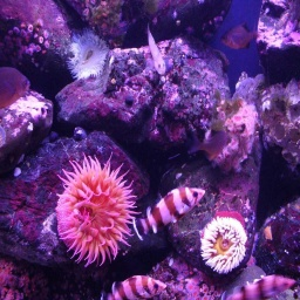

support tensor([[ 136.8267,   64.0165, -137.2065, -155.4443, -163.7677,   13.2257,
         -146.0218,  -75.2518, -100.6588,    4.2347, -128.3098]],
       grad_fn=<AddmmBackward0>)
Predicted class : animal fish


'animal fish'

In [63]:
img_path = r"E:\project\fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test\animal fish\0JESIL2U7PFG.jpg"
pred_image_class(img_path)

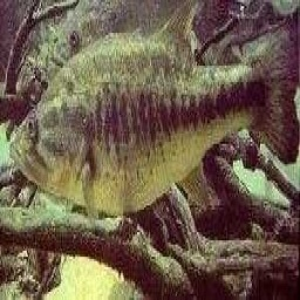

support tensor([[ 29.3959,  19.8692, -52.8387,  -6.4130, -29.8548, -45.4173, -27.4812,
         -15.6477, -72.4619, -39.2901, -13.4604]], grad_fn=<AddmmBackward0>)
Predicted class : animal fish


'animal fish'

In [69]:
img_path = r"E:\project\fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\train\animal fish bass\2VGLYRKAR81X.jpg"
pred_image_class(img_path)

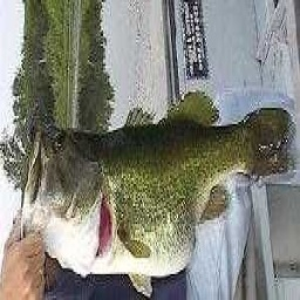

support tensor([[ 21.6474,  15.8381, -30.0468,  -8.6987, -16.2747, -21.3213, -15.5310,
          -8.9302, -34.6645, -21.0563, -19.4065]], grad_fn=<AddmmBackward0>)
Predicted class : animal fish


'animal fish'

In [65]:
img_path = r"E:\project\Fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test\animal fish bass\QM9BXIGZ5RUE.jpg"
pred_image_class(img_path)

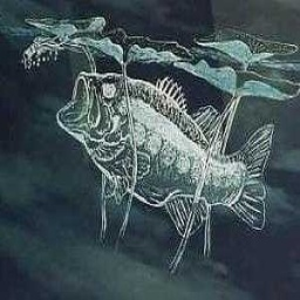

support tensor([[ 32.3243,  24.1575, -35.3937,  -3.3143, -19.3102, -44.0945, -51.1979,
         -10.9681, -82.5731, -41.0474, -14.6083]], grad_fn=<AddmmBackward0>)
Predicted class : animal fish


'animal fish'

In [66]:
img_path = r"E:\project\fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test\animal fish bass\00CQHPZMXGCH.jpg"
pred_image_class(img_path)

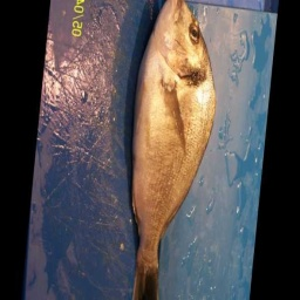

support tensor([[-13.3105, -13.4109,  -8.7406,   8.0000,  -3.0047, -12.6795,   0.7311,
           3.3545,  -4.4101,   0.8378, -10.7435]], grad_fn=<AddmmBackward0>)
Predicted class : fish sea_food gilt_head_bream


'fish sea_food gilt_head_bream'

In [67]:
img_path = r"E:\project\Fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test\fish sea_food gilt_head_bream\2DDEBUHWJ3T3.jpg"
pred_image_class(img_path)

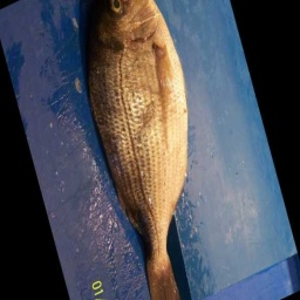

support tensor([[ -9.8089,  -7.3212, -12.3937,   6.4763,  -3.0170, -13.3402,  13.7988,
           2.0819, -12.0130,   0.8152,   5.5225]], grad_fn=<AddmmBackward0>)
Predicted class : fish sea_food red_sea_bream


'fish sea_food red_sea_bream'

In [54]:
img_path = r"E:\project\Fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test\fish sea_food red_sea_bream\1B9XK9A42ENM.jpg"
pred_image_class(img_path)

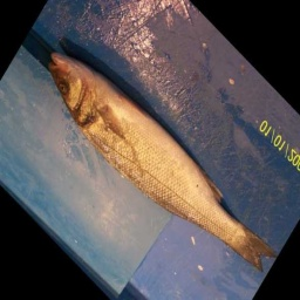

support tensor([[ -9.7372,  -6.1128,  -8.6779,   3.7160,  -1.6917, -17.8990,  -0.4367,
           6.8140,  -8.8370,   0.7088,  -4.5191]], grad_fn=<AddmmBackward0>)
Predicted class : fish sea_food sea_bass


'fish sea_food sea_bass'

In [55]:
img_path = r"E:\project\Fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test\fish sea_food sea_bass\1A8RH8XN7Y1Q.jpg"
pred_image_class(img_path)

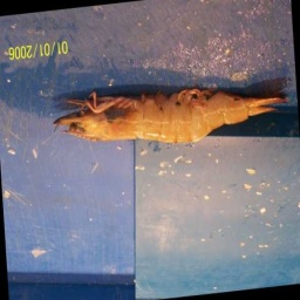

support tensor([[ -3.5489, -12.2051,  -6.7573,  -4.4370,  -5.0125,  -6.6616, -11.1751,
          -5.5867,  10.0965,   1.1396, -13.4675]], grad_fn=<AddmmBackward0>)
Predicted class : fish sea_food shrimp


'fish sea_food shrimp'

In [56]:
img_path = r"E:\project\Fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test\fish sea_food shrimp\1W0TTFKZ231E.jpg"
pred_image_class(img_path)

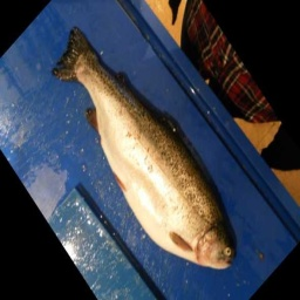

support tensor([[ -8.6784,  -7.7591, -11.2355,   3.5228,  -1.8066, -12.6903,   3.5811,
           2.2285, -20.5625,  -5.3104,   8.6119]], grad_fn=<AddmmBackward0>)
Predicted class : fish sea_food trout


'fish sea_food trout'

In [57]:
img_path = r"E:\project\fish_image_classification_project_5\images.cv_jzk6llhf18tm3k0kyttxz\data\test\fish sea_food trout\1DWKSG8GX1YT.jpg"
pred_image_class(img_path)